In [104]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_fscore_support

In [86]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
Outcome_0=df[df['Outcome']==0]
Outcome_0.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [73]:
Cor_matrix=df.corr()
Cor_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [57]:
Counts=df['Outcome'].value_counts()
Counts

0    500
1    268
Name: Outcome, dtype: int64

In [61]:
Percentage_0=Counts[0]/Counts.sum()
Percentage_1=Counts[1]/Counts.sum()
print('0=',Percentage_0,'1=',Percentage_1)

0= 0.6510416666666666 1= 0.3489583333333333


In [26]:
Top_features=['Pregnancies','Glucose','BMI','Age'] #>0.20
X=df[Top_features]
y=df['Outcome']
X.head()
#y.head()

,Pregnancies,Glucose,BMI,Age
0,6,148,33.6,50
1,1,85,26.6,31
2,8,183,23.3,32
3,1,89,28.1,21
4,0,137,43.1,33


In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=100)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 4)
(192, 4)
(576,)
(192,)


In [30]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_train_pred = Log_reg.predict(X_train)

In [40]:
y_train_plot=pd.DataFrame({'y_train':y_train,'y_train_pred':y_train_pred})
y_train_plot.head()

,y_train,y_train_pred
579,1,1
46,0,0
508,0,0
384,0,0
163,0,0


[[331  42]
 [ 83 120]]


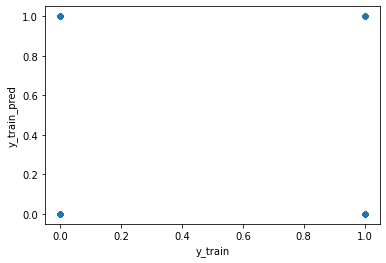

In [65]:
y_train_plot.plot.scatter('y_train','y_train_pred')
print(confusion_matrix(y_train,y_train_pred))

In [77]:
tn, fp, fn, tp = confusion_matrix(y_train,y_train_pred).ravel()
print('tn=',tn,'fp=',fp,'fn=',fn,'tp=',tp )

tn= 331 fp= 42 fn= 83 tp= 120


In [51]:
accuracy_score(y_train, y_train_pred)

0.7829861111111112

In [71]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       373
           1       0.74      0.59      0.66       203

    accuracy                           0.78       576
   macro avg       0.77      0.74      0.75       576
weighted avg       0.78      0.78      0.78       576



[[105  22]
 [ 31  34]]


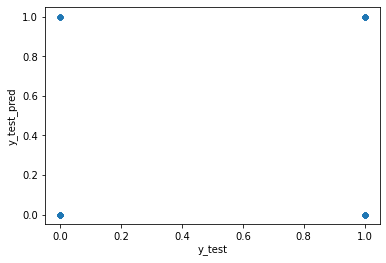

In [66]:
y_test_pred = Log_reg.predict(X_test)
y_test_plot=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_pred})
#y_test_plot.head()
y_test_plot.plot.scatter('y_test','y_test_pred')
print(confusion_matrix(y_test,y_test_pred))

In [50]:
accuracy_score(y_test, y_test_pred)

0.7239583333333334

In [70]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       127
           1       0.61      0.52      0.56        65

    accuracy                           0.72       192
   macro avg       0.69      0.67      0.68       192
weighted avg       0.72      0.72      0.72       192



In [78]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()
print('tn=',tn,'fp=',fp,'fn=',fn,'tp=',tp )
#FP: Type I error
#FN: Type II error

tn= 105 fp= 22 fn= 31 tp= 34


In [105]:
precision_recall_fscore_support(y_test, y_test_pred, average='macro')

(0.6896008403361344, 0.6749242883101151, 0.6802312792634257, None)